In [36]:
import numpy as np
import pandas as pd

#### Load Dataset

In [37]:
ad = pd.read_csv("Ad_Click.csv")
ad.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 12:53:00 AM,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39:00 AM,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 8:35:00 PM,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31:00 AM,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36:00 AM,0


#### Identification of Numarical and Categorial Variables:

##### Catogorial variables

In [38]:
ad.select_dtypes(include = ['object']).columns

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

##### Numarial Variables

In [39]:
ad.select_dtypes(include = ['number']).columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'Clicked on Ad'],
      dtype='object')

In [40]:
ad.duplicated().sum()

0

In [41]:
ad[ad.columns].isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

#### Check Correlation between valiables

In [42]:
cor = ad.corr()
cor

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Gender,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


#### Data Preprocessing

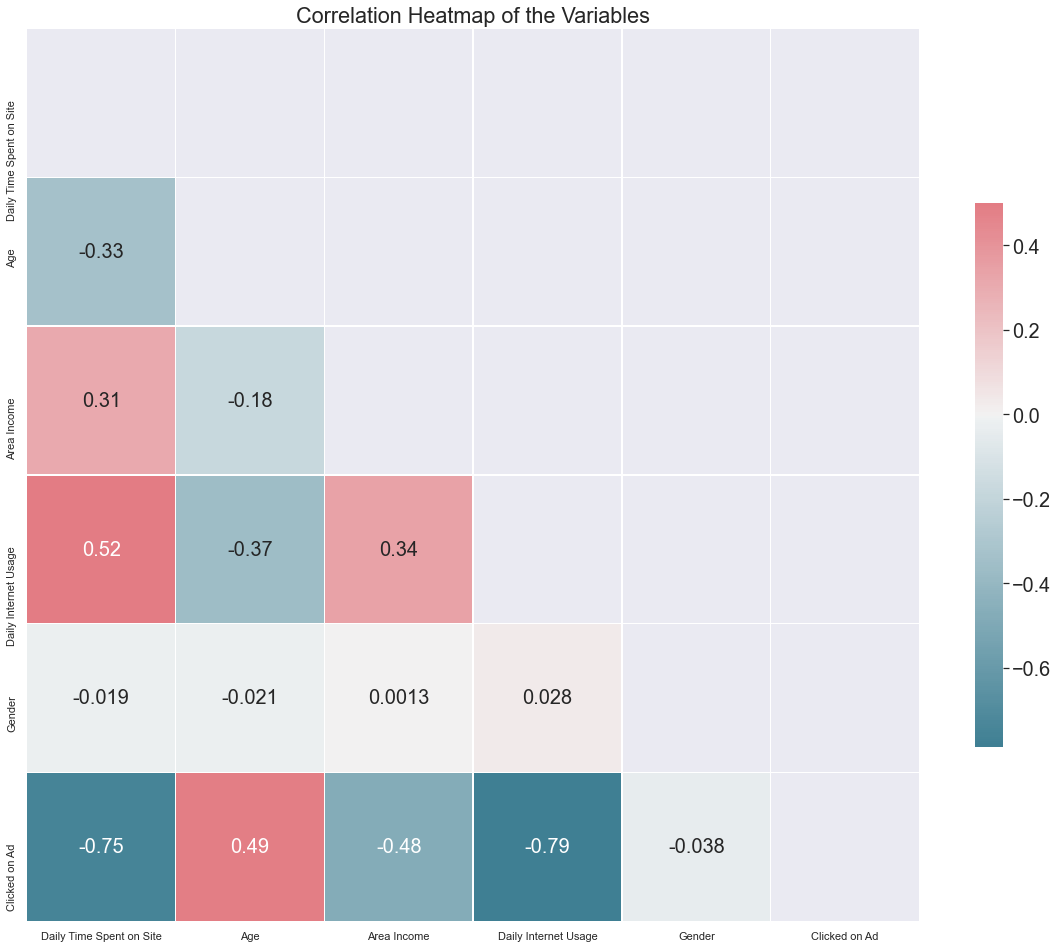

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = ad.corr()


# upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 20))

sns.set(font_scale=1.8)

# Generate a custom diverging colourmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=.5, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    annot=True, annot_kws={"fontsize":20}
)
sns.set(font_scale=1.8)
ax.set_title('Correlation Heatmap of the Variables')

plt.show()


In [44]:
# Convert Timestamp to a more appropreate data type
ad['Timestamp'] = pd.to_datetime(ad['Timestamp'])

ad['Month'] = ad['Timestamp'].dt.month
ad['Day'] = ad['Timestamp'].dt.day
ad['Hour'] = ad['Timestamp'].dt.hour
ad['Weekday'] = ad['Timestamp'].dt.dayofweek
ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:00,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:00,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:00,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:00,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:00,0,6,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,2,11,21,3
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:00,1,4,22,2,4
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:00,1,2,1,17,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:00,0,3,24,2,3


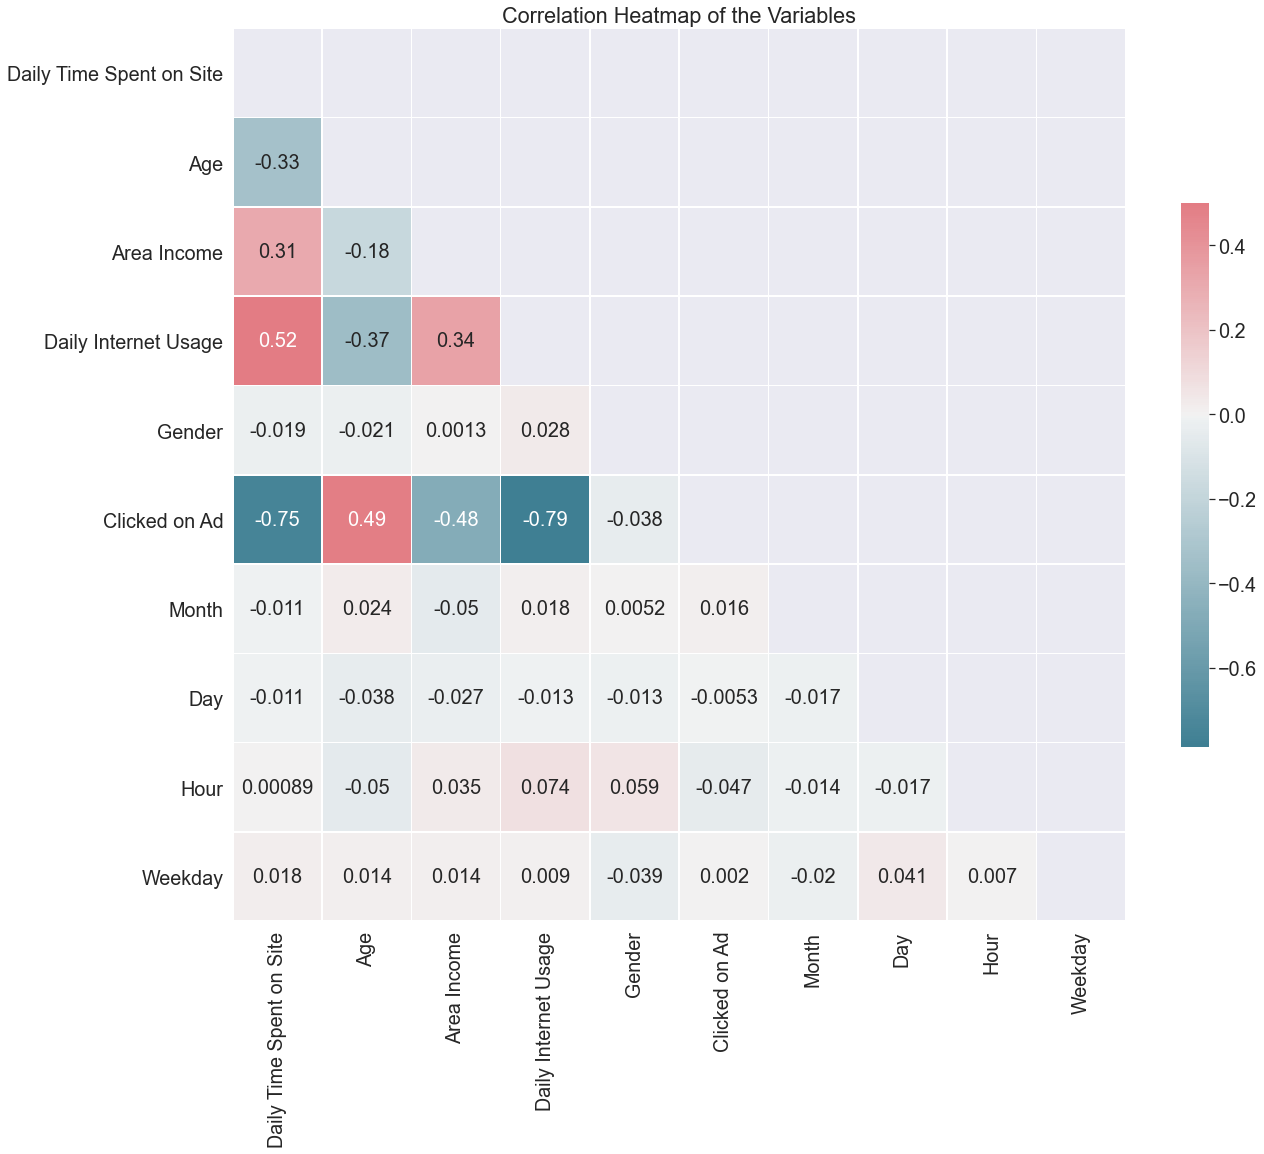

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = ad.corr()

# upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 20))

sns.set(font_scale=1.8)

# Generate a custom diverging colourmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=.5, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    annot=True, annot_kws={"fontsize":20}
)
sns.set(font_scale=1.8)
ax.set_title('Correlation Heatmap of the Variables')

plt.show()


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


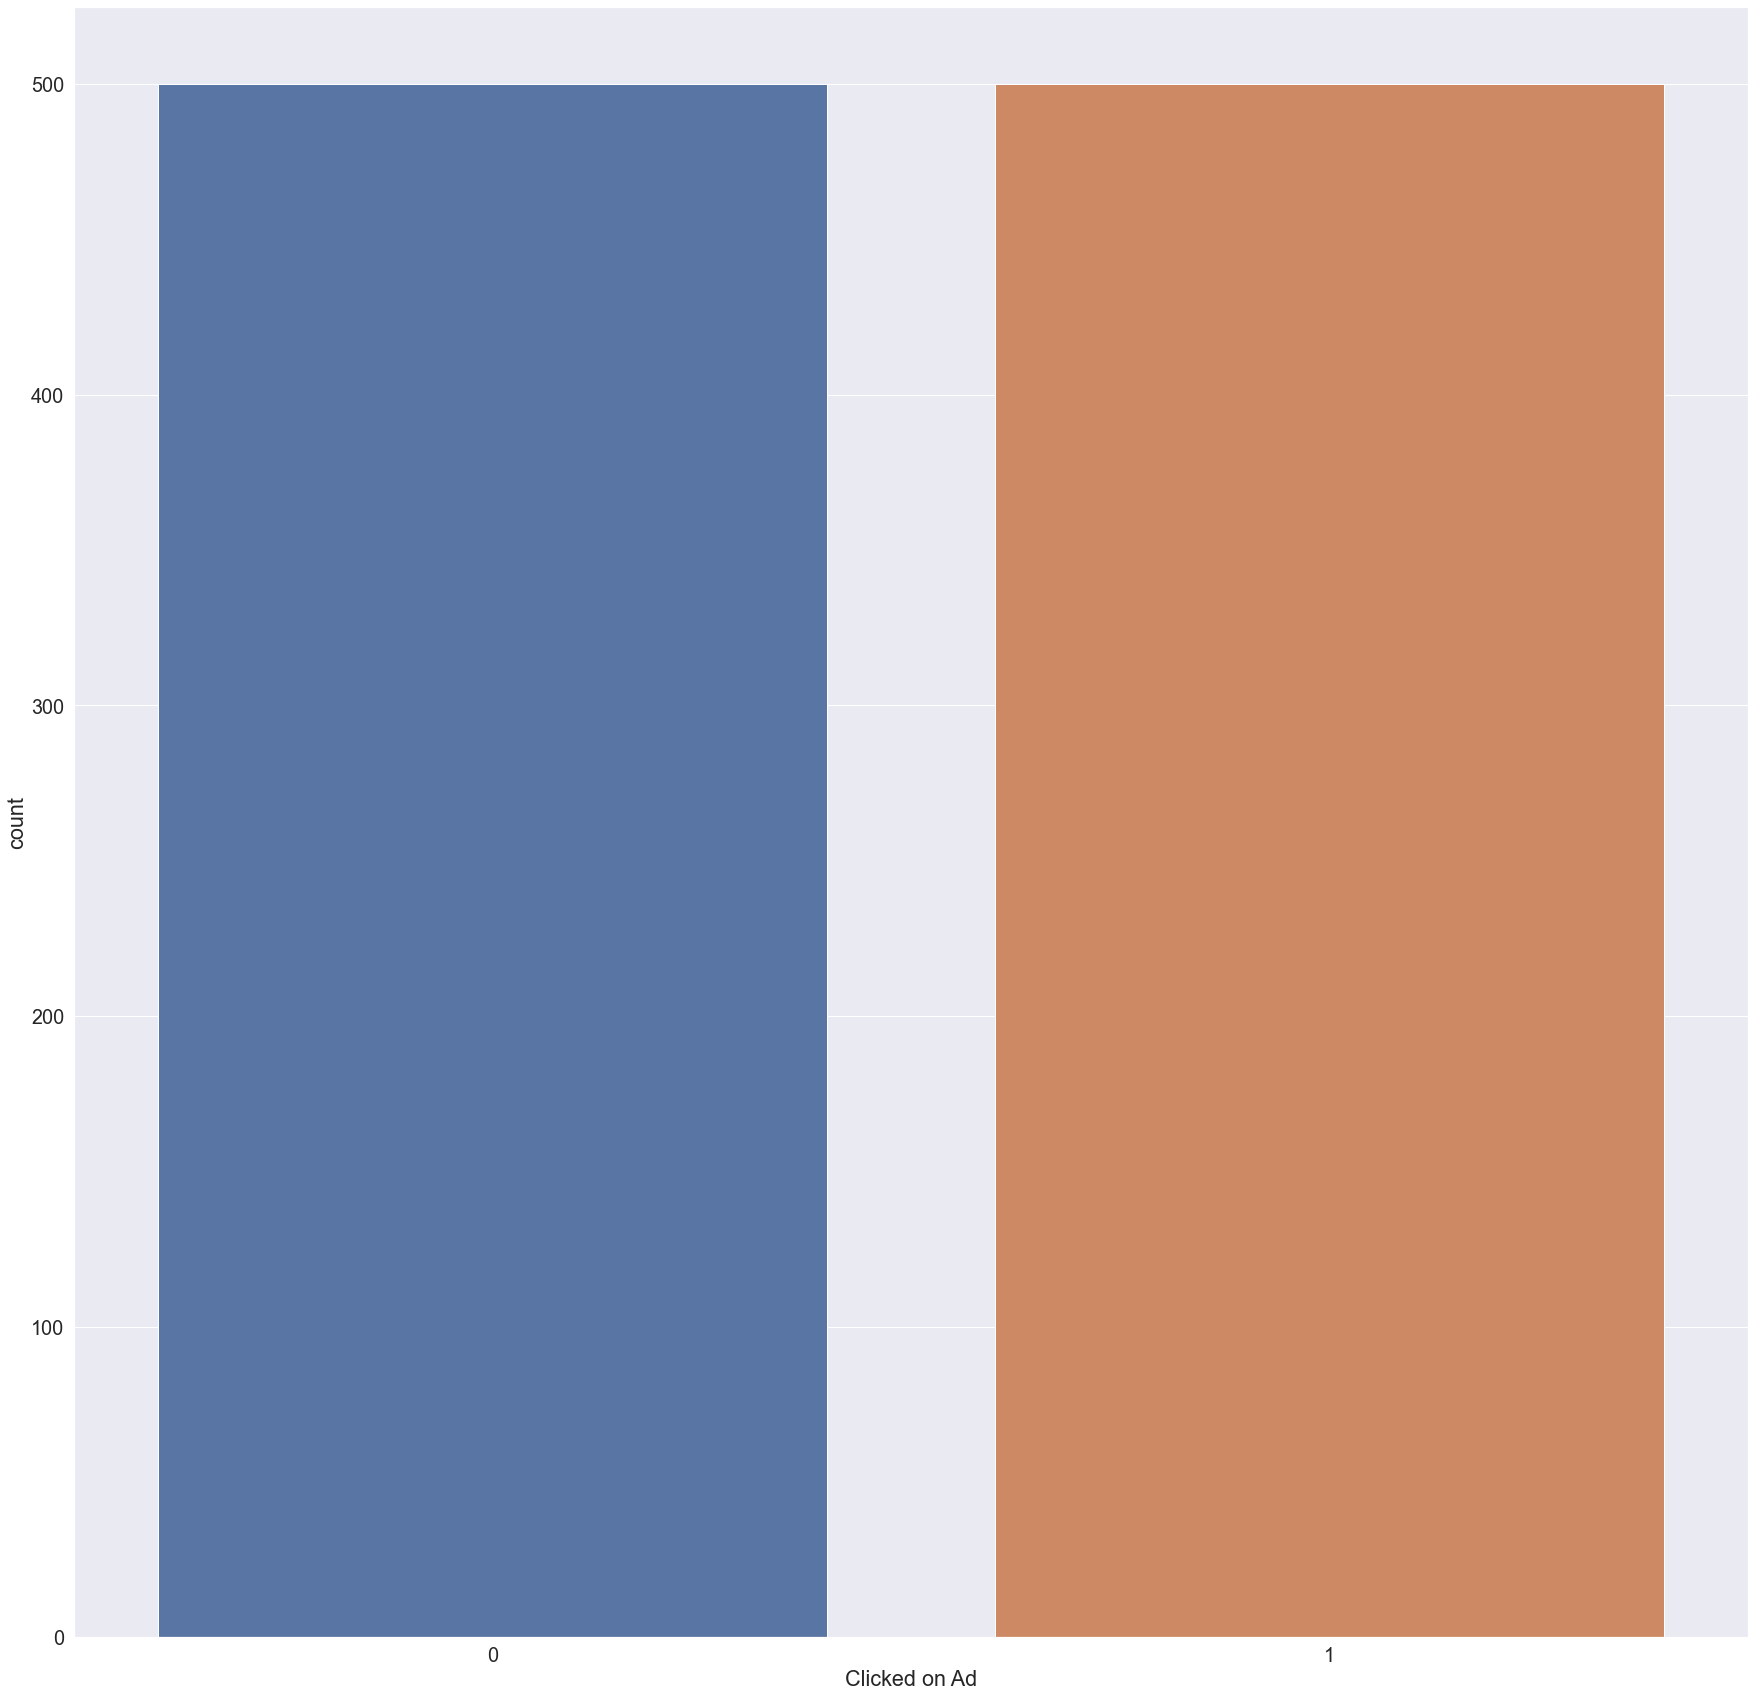

In [46]:
sns.countplot(ad['Clicked on Ad'], data=ad)

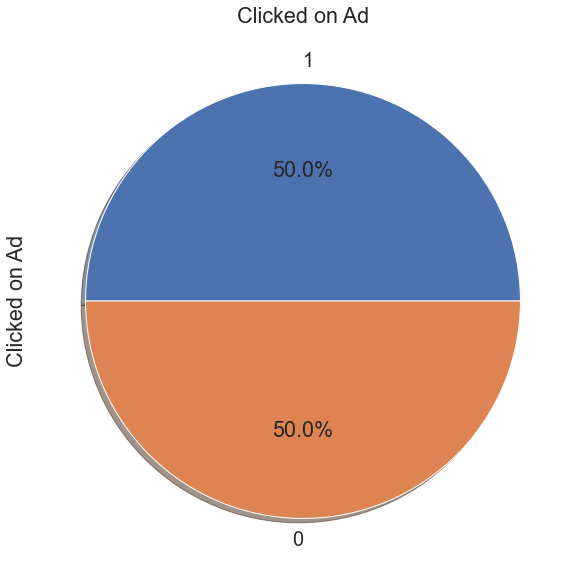

In [47]:
# which genre had the most movies over all the years 
ad_click = ad['Clicked on Ad'].value_counts()
ad_click[:10].plot(kind = 'pie', figsize=(15,10), shadow = True, 
                    autopct = '%1.1f%%', title='Clicked on Ad')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


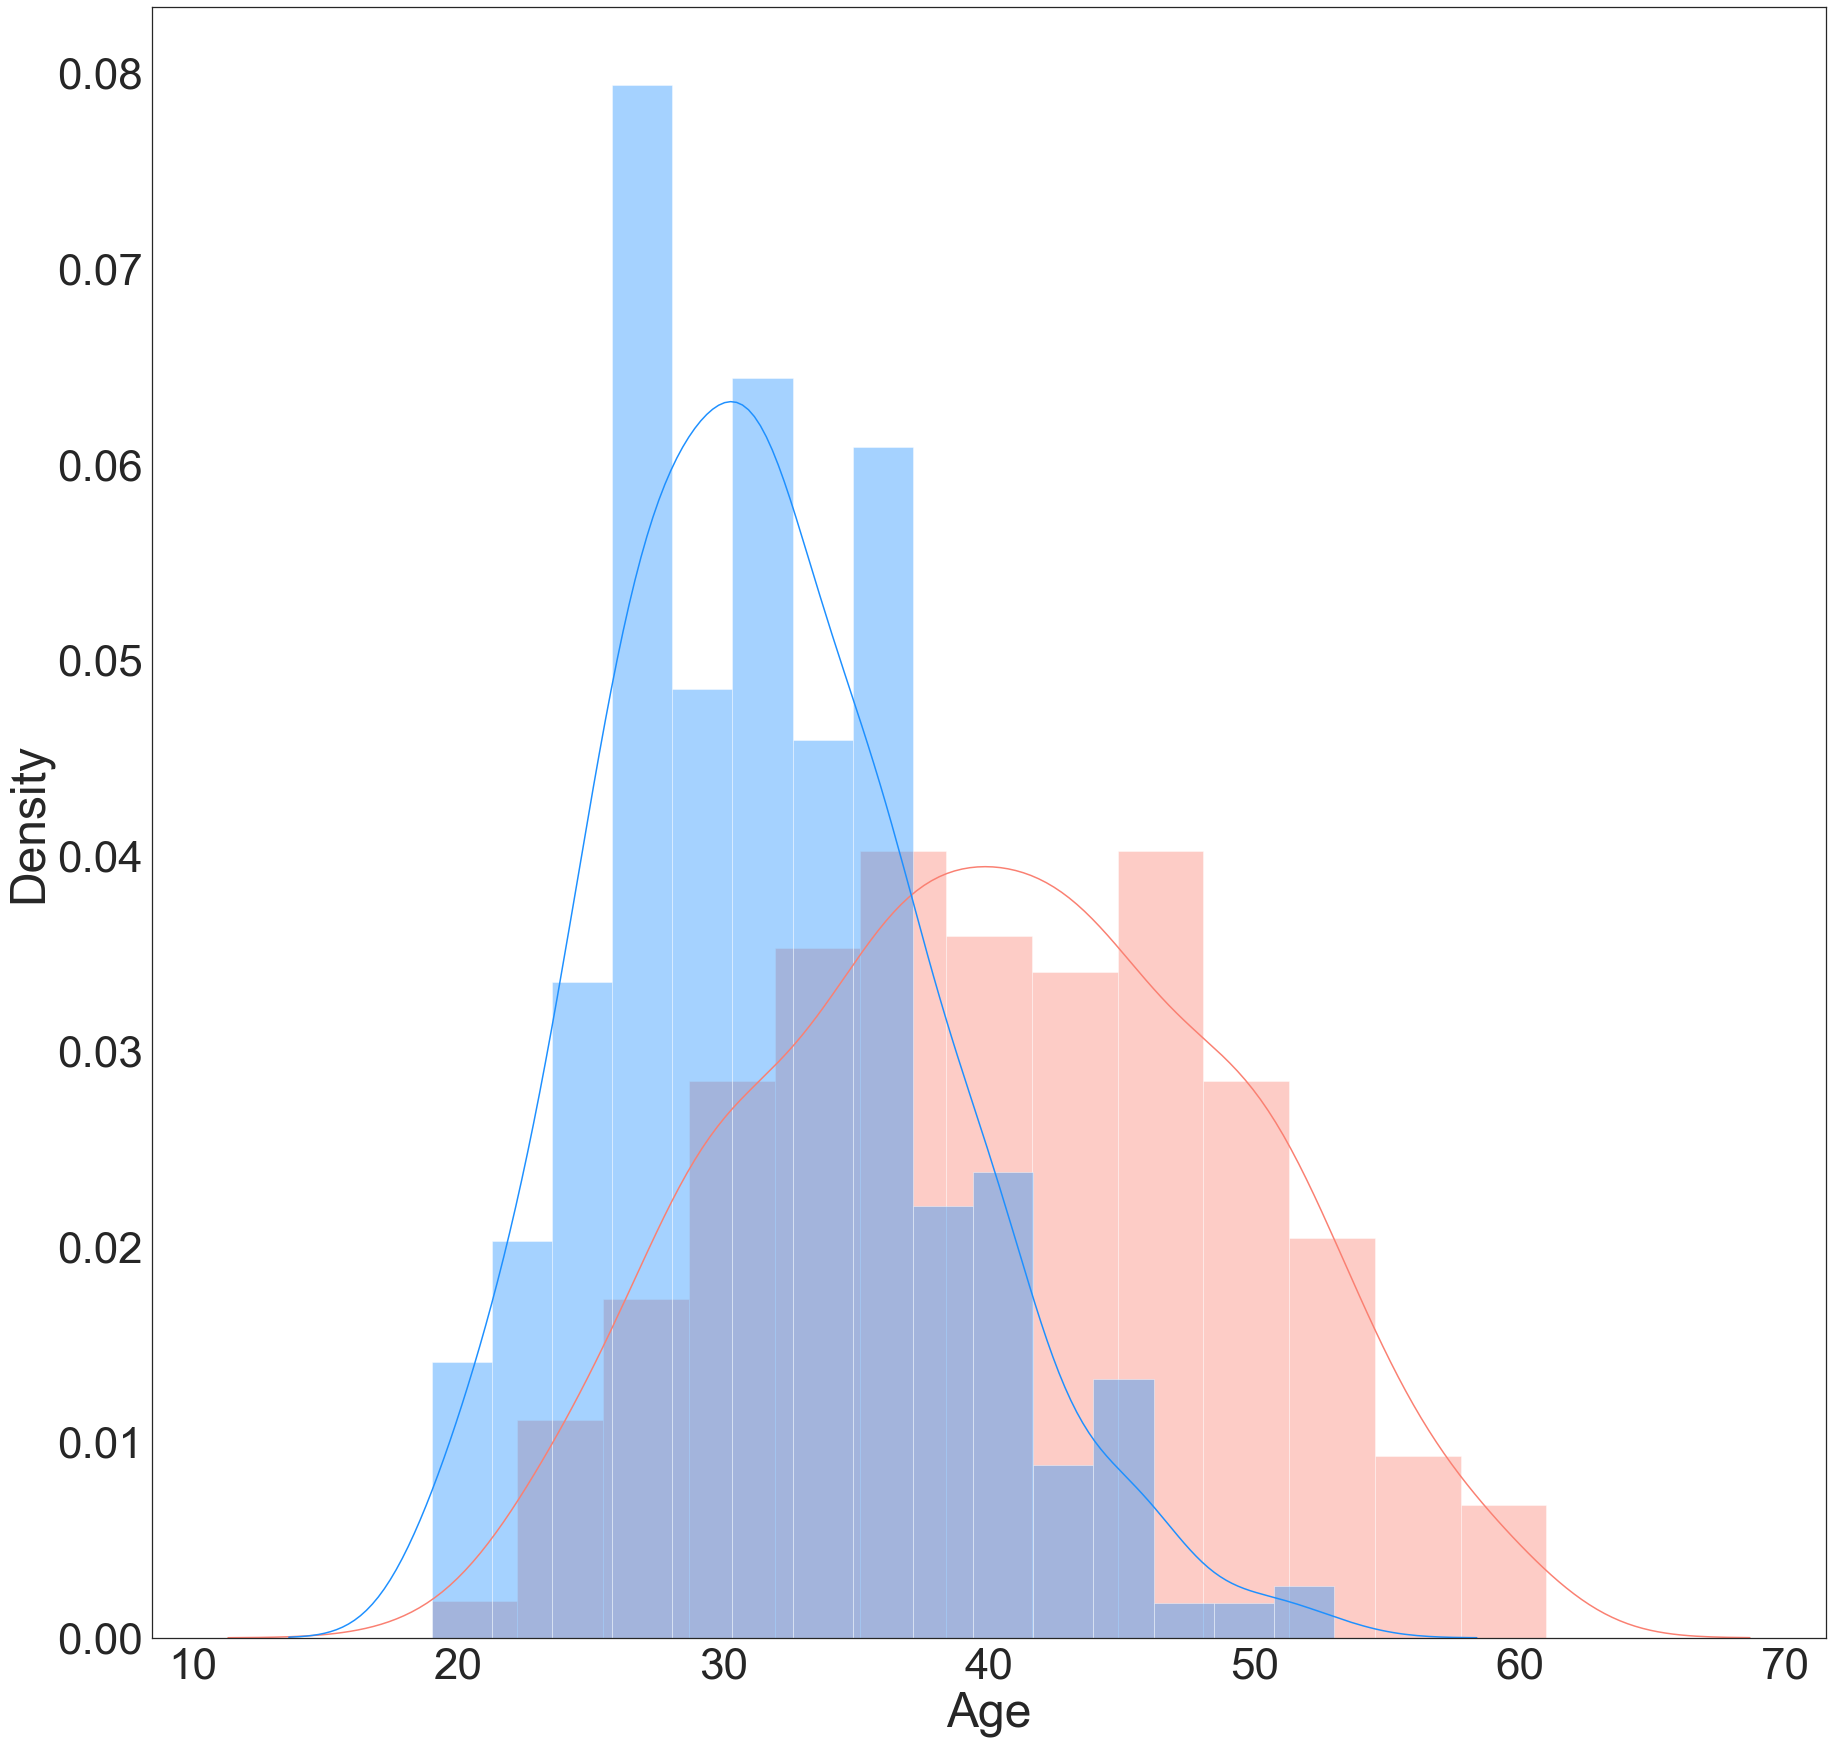

In [48]:
sns.set(font_scale=4)
sns.set_style("white")
sns.distplot(ad['Age'][ad['Clicked on Ad']==1], color='salmon')
sns.distplot(ad['Age'][ad['Clicked on Ad']==0], color='dodgerblue')

plt.show()

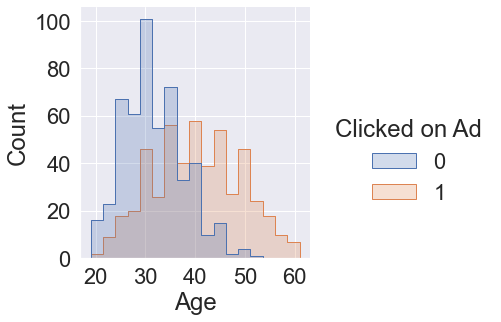

In [49]:
sns.set(font_scale=2)
sns.displot(ad, x="Age", element="step", hue = 'Clicked on Ad')

sns.set(rc={'figure.figsize':(30,30)})

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


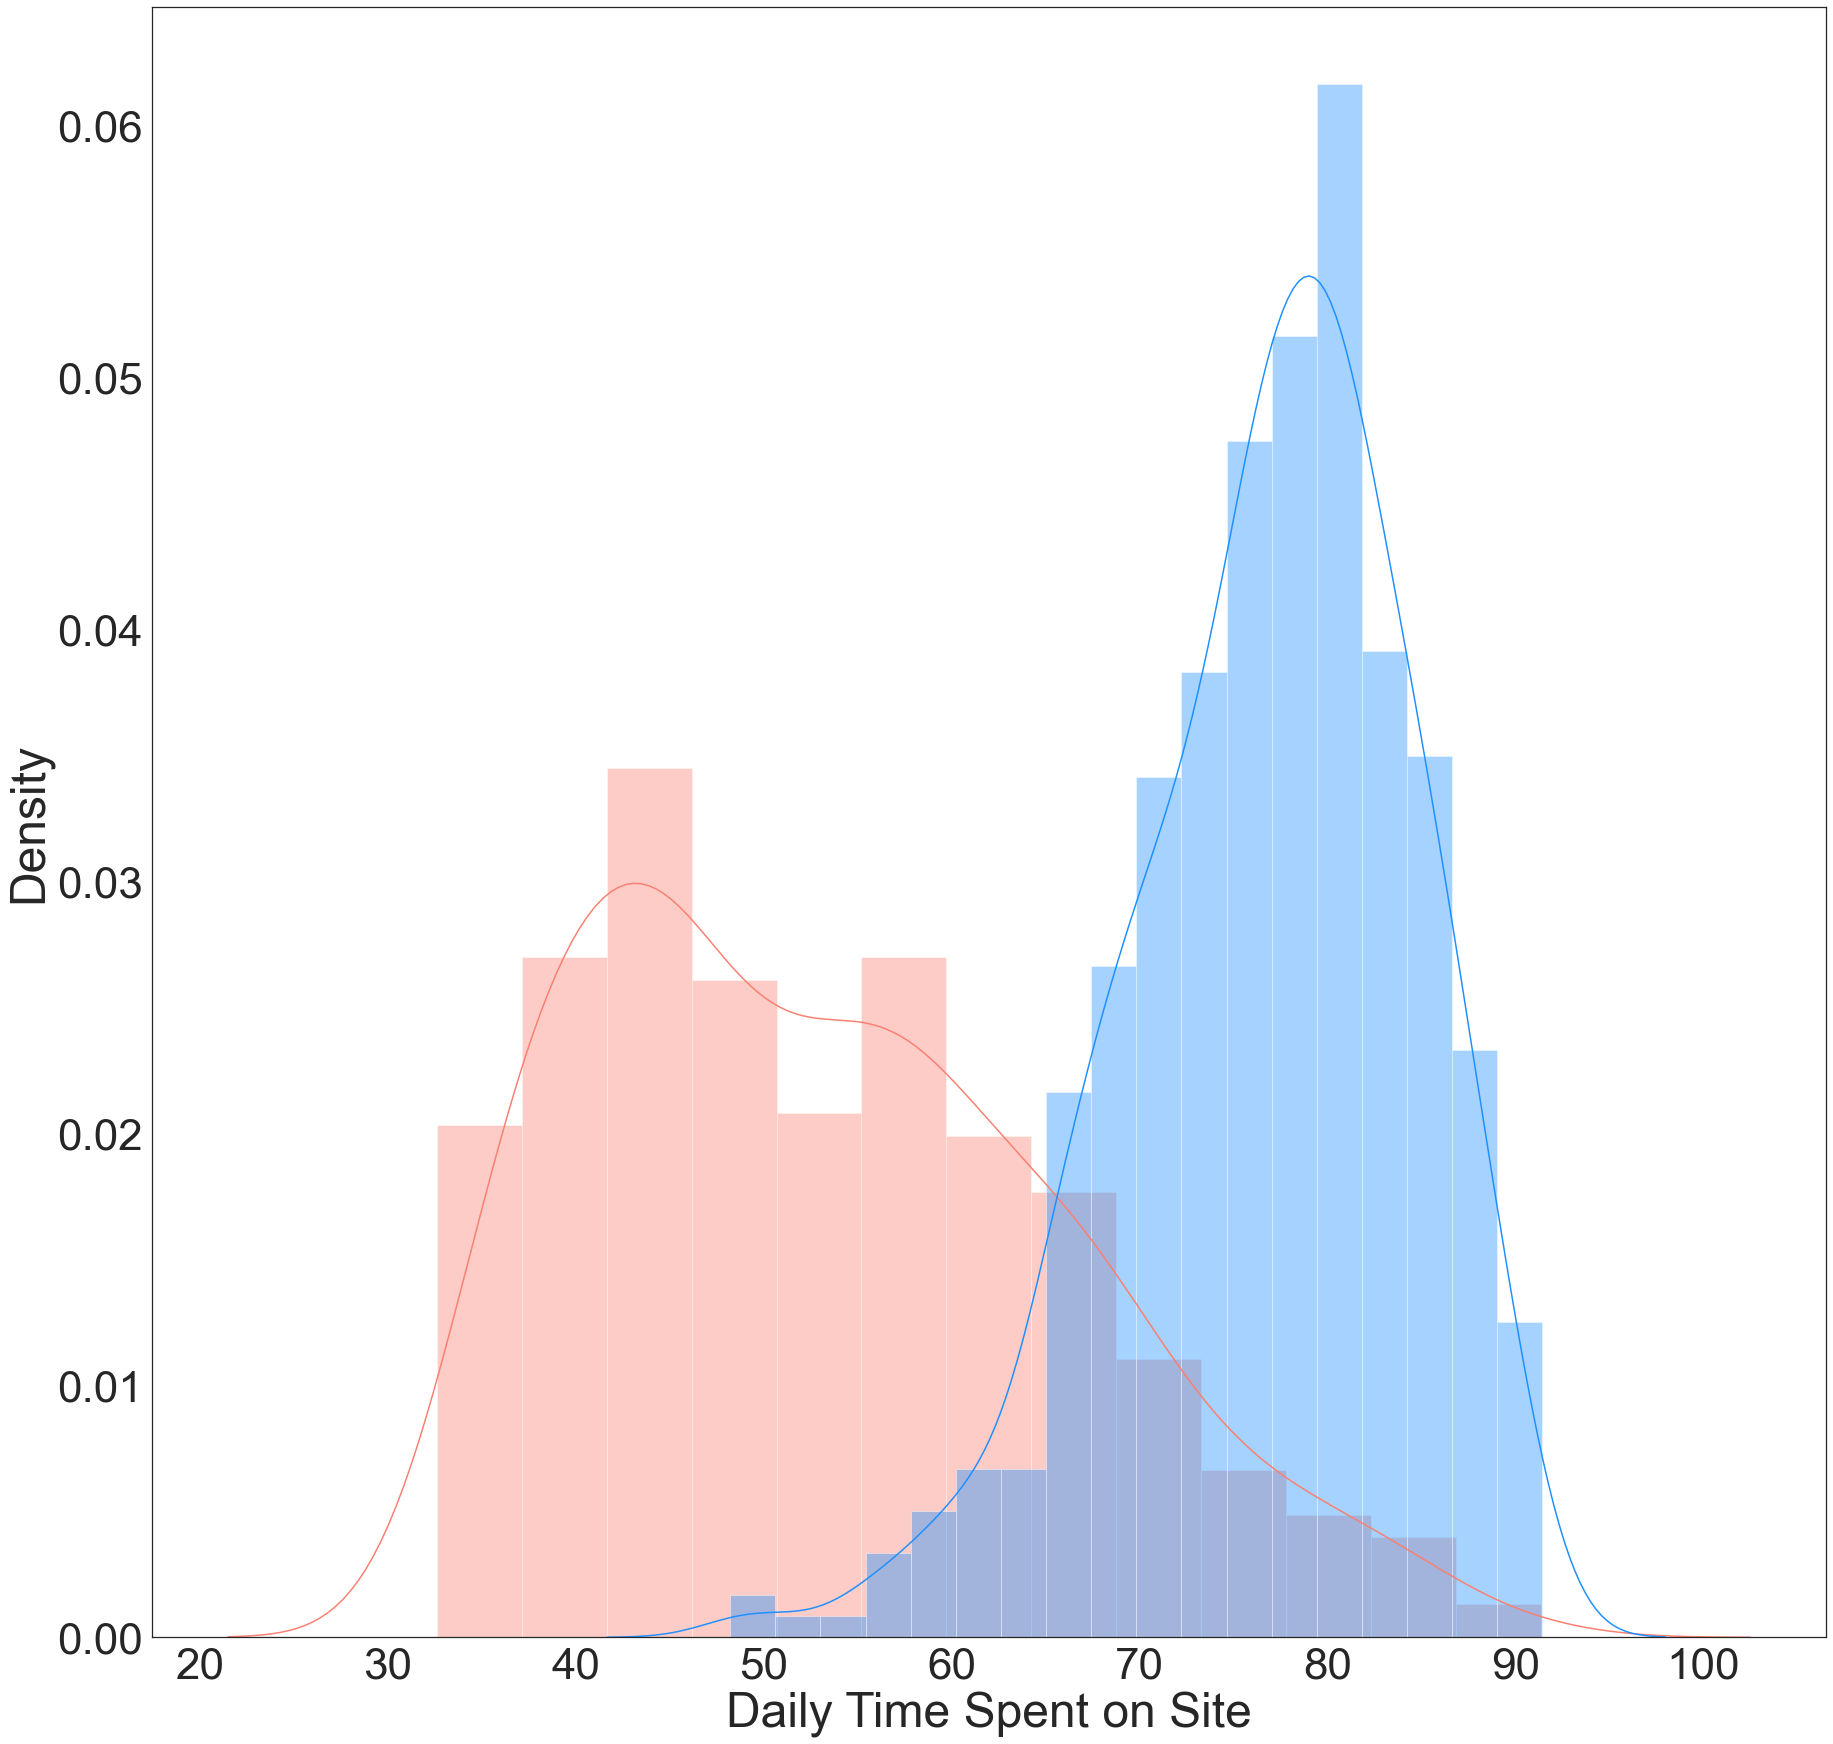

In [50]:
sns.set(font_scale=4)
sns.set_style("white")
sns.distplot(ad['Daily Time Spent on Site'][ad['Clicked on Ad']==1], color='salmon')
sns.distplot(ad['Daily Time Spent on Site'][ad['Clicked on Ad']==0], color='dodgerblue')

plt.show()

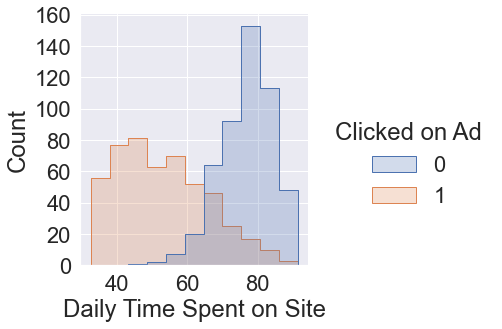

In [51]:
sns.set(font_scale=2)
sns.displot(ad, x="Daily Time Spent on Site", element="step", hue = 'Clicked on Ad')

sns.set(rc={'figure.figsize':(30,30)})

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


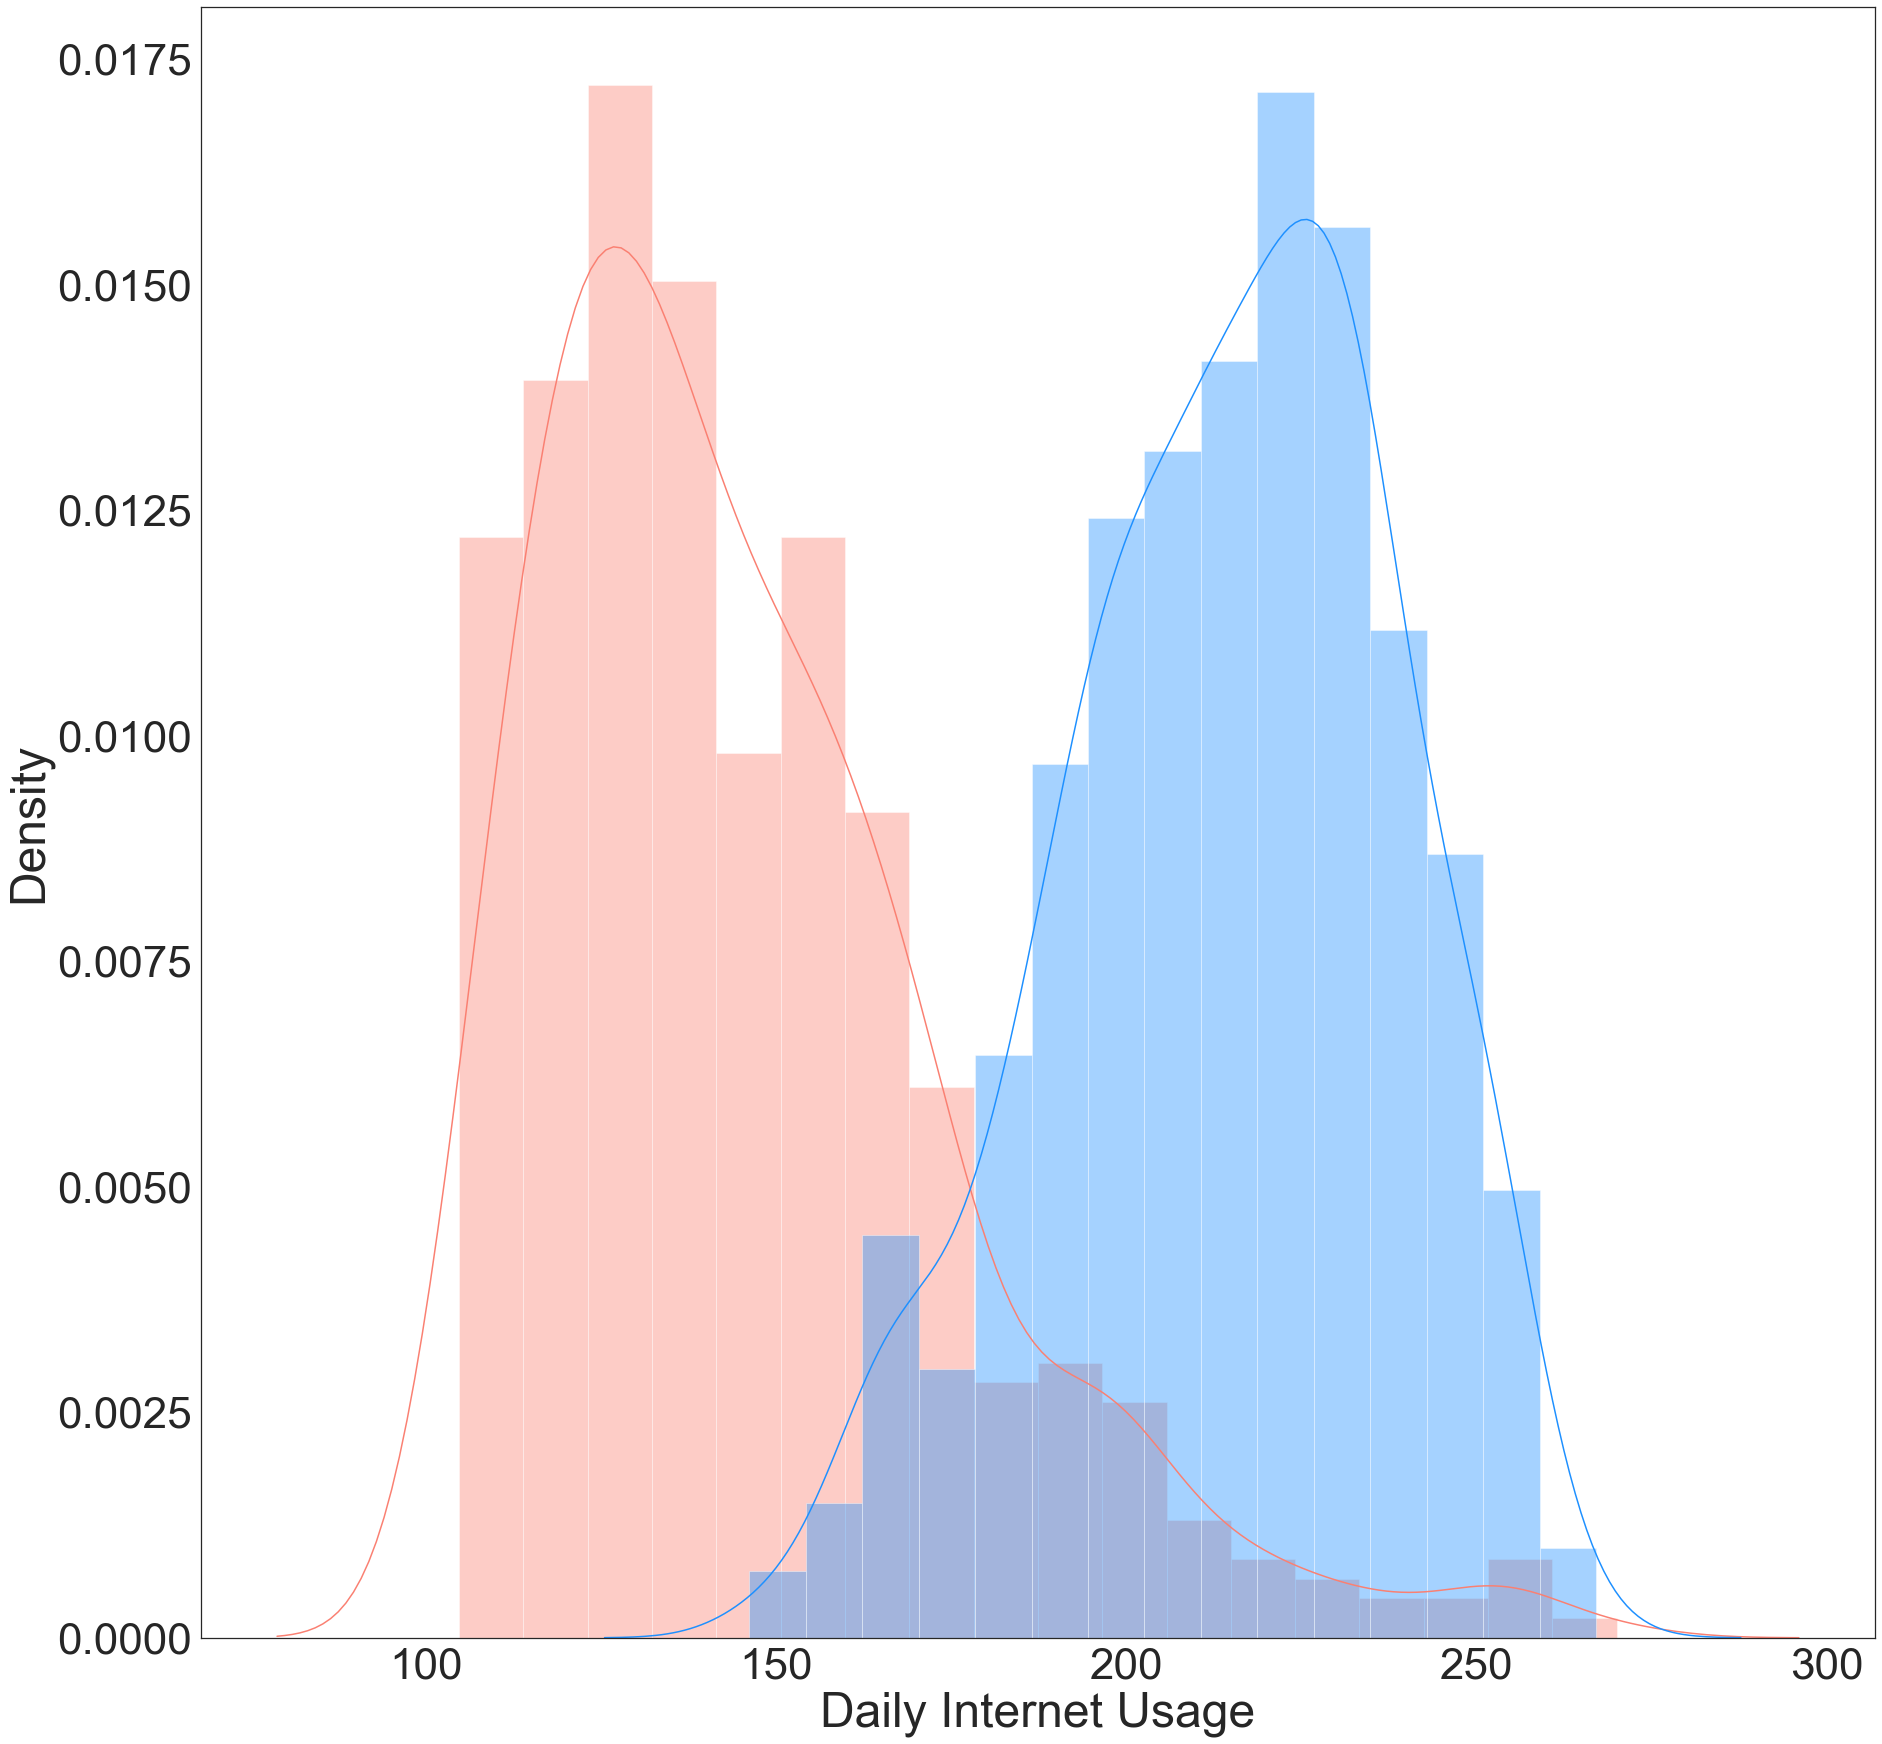

In [52]:
sns.set(font_scale=4)
sns.set_style("white")
sns.distplot(ad['Daily Internet Usage'][ad['Clicked on Ad']==1], color='salmon')
sns.distplot(ad['Daily Internet Usage'][ad['Clicked on Ad']==0], color='dodgerblue')

plt.show()

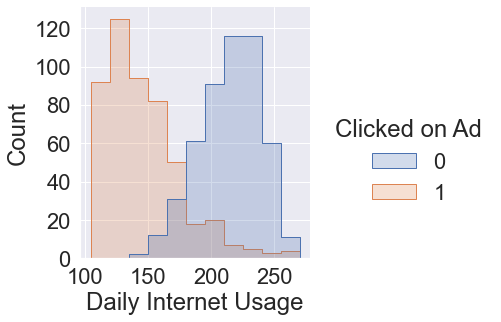

In [53]:
sns.set(font_scale=2)
sns.displot(ad, x="Daily Internet Usage", element="step", hue = 'Clicked on Ad')

sns.set(rc={'figure.figsize':(30,30)})

In [97]:
from sklearn.model_selection import train_test_split

X = ad[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Month']]
y = ad['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [98]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier  
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# fig = plt.figure(figsize=(20,18))
# tree_plot = tree.plot_tree(clf, 
#                    filled=True)

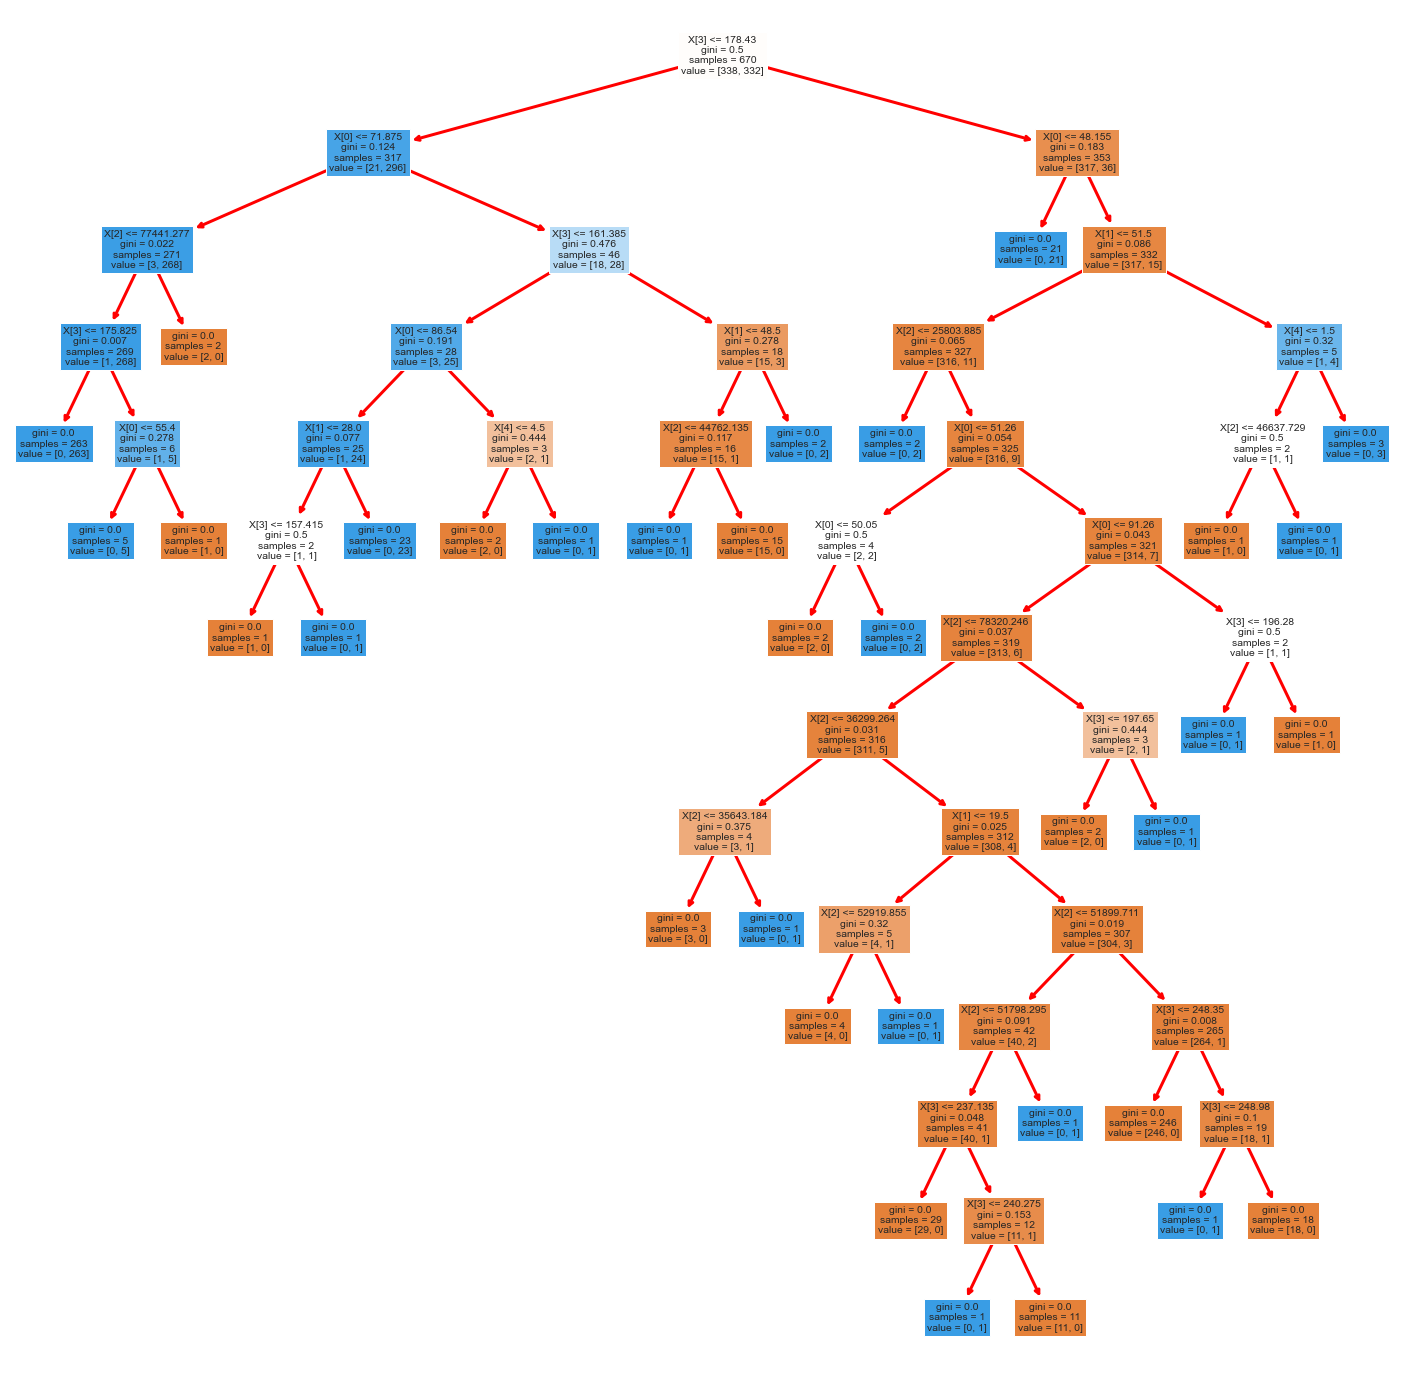

In [102]:
fig = plt.figure(figsize=(25,25))
tree_plot = tree.plot_tree(clf, filled=True)
out = tree.plot_tree(clf, filled=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

## Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

mdl = LogisticRegression(solver='lbfgs')
mdl.fit(X_train, y_train)
predictions = mdl.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions, y_test))

Logistic regression accuracy: 0.9


In [121]:
# print('')
# print('Confusion matrix for logistic regression:')
# print(confusion_matrix(y_test,predictions_LR))

In [105]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predictions_DT = model_2.predict(X_test)

print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_DT))


Decision tree accuracy: 0.9363636363636364

Confusion matrix:
[[153   9]
 [ 12 156]]


In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree

dtc = tree.DecisionTreeClassifier()

dtc = RandomForestClassifier(criterion='gini', n_estimators=40,
                             min_samples_split=10,
                             max_features='auto',
                             random_state=42)

dtc.fit(X_train,y_train)

y_predicted = dtc.predict(X_test)

print('Confusion matrix for random forest:')
print(confusion_matrix(y_test,y_predicted))


Confusion matrix for random forest:
[[155   7]
 [ 12 156]]


In [127]:
print('Accuracy of random forest model: {:.3f}'.format(accuracy_score(y_test, y_predicted)))
print('f1 score of random forest model: {:.3f}'.format(f1_score(y_test, y_predicted, average='micro')))
#print('Random Forest accuary score: ', dtc.score(X_train, y_train))

Accuracy of random forest model: 0.942
f1 score of random forest model: 0.942
